In [1]:
import pandas as pd
import numpy as np

In [3]:
crop = pd.read_csv("Crop_recommendation.csv")

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.shape

(2200, 8)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [7]:
crop.duplicated().sum()

0

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
crop.corr()

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.089334
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.054227
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.959981
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.264978
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.908100
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.145291
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.943886
label,-0.089334,0.054227,-0.959981,-0.264978,-0.908100,-0.145291,-0.943886,1.000000


In [10]:
# Before calling crop.corr(), exclude the 'label' column,
# or any other columns containing non-numeric data, using the 'numeric_only' argument:
crop.corr(numeric_only=True)

# Alternatively, if you need correlations involving 'label'
# after conversion, you can map the values to numerical equivalents:
crop_dict = {
    'rice': 1,
    'maize': 2,
    # ... (rest of your crop mappings)
}
crop['label'] = crop['label'].map(crop_dict)
crop.corr() # Calculate correlations after mapping

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.089334
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.054227
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.959981
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.264978
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.908100
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.145291
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.943886
label,-0.089334,0.054227,-0.959981,-0.264978,-0.908100,-0.145291,-0.943886,1.000000


<Axes: >

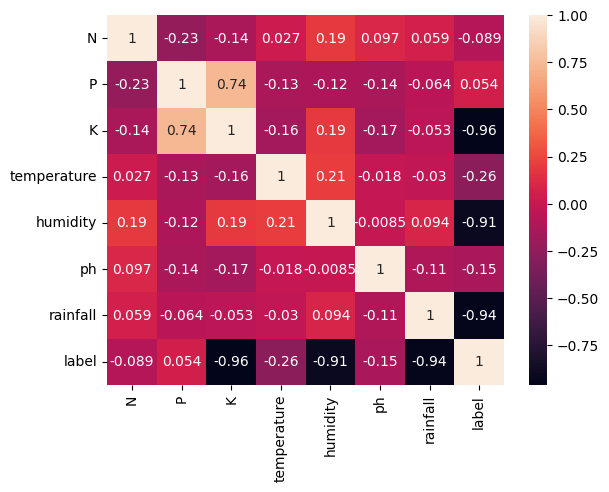

In [12]:
import seaborn as sns
sns.heatmap(crop.corr(), annot=True, cbar=True)

In [13]:
# Before calling crop.corr(), exclude the 'label' column,
# or any other columns containing non-numeric data, using the 'numeric_only' argument:
crop.corr(numeric_only=True)

# Alternatively, if you need correlations involving 'label'
# after conversion, you can map the values to numerical equivalents:
crop_dict = {
    'rice': 1,
    'maize': 2,
    # ... (rest of your crop mappings)
}
crop['label'] = crop['label'].map(crop_dict)
crop.corr() # Calculate correlations after mapping

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,NaN
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,NaN
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,NaN
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,NaN
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,NaN
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,NaN
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
crop.label.value_counts()

,count
label,


In [15]:
crop['label'].unique().size

1

<ipython-input-16-eaf3da0da963>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'])


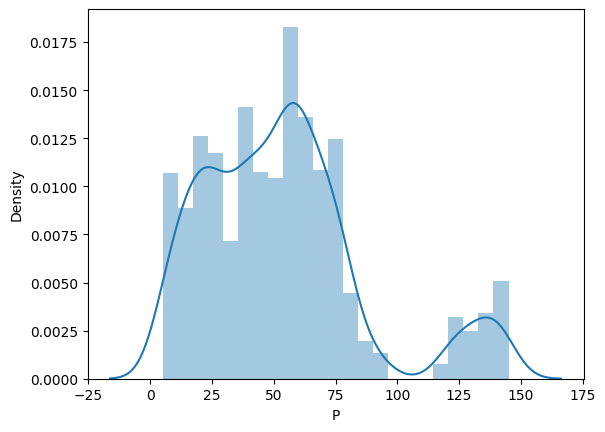

In [16]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

<ipython-input-17-112d7ba78cc4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


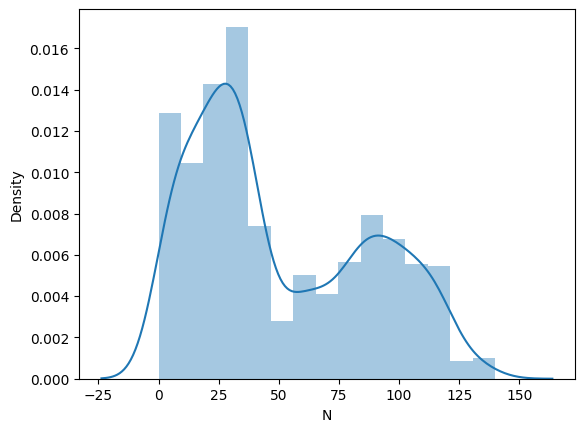

In [17]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [18]:
crop.label.unique()

array([nan])

In [19]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [20]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,NaN


In [21]:
crop.label.unique()

array([nan])

In [22]:
crop.label.value_counts()

,count
label,


In [23]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [24]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [25]:
y.head()

,label
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [27]:
X_train.shape

(1760, 7)

In [28]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [29]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [32]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [37]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model with accuracy: 0.9704545454545455
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9795454545454545
KNeighborsClassifier model with accuracy: 0.9840909090909091
DecisionTreeClassifier model with accuracy: 0.9954545454545455
ExtraTreeClassifier model with accuracy: 0.9113636363636364
RandomForestClassifier model with accuracy: 0.9977272727272727
BaggingClassifier model with accuracy: 0.9954545454545455
GradientBoostingClassifier model with accuracy: 0.9954545454545455
AdaBoostClassifier model with accuracy: 0.16136363636363638


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
# ... (Import other models)
from sklearn.metrics import accuracy_score

# ... (Your previous code)

# Instead of removing rows with NaN, replace them with a suitable value (e.g., 0):
crop['label'] = crop['label'].fillna(0)  # Replace NaN in 'label' with 0

# Define X and y after handling NaN
X = crop.drop('label', axis=1)
y = crop['label']

# Split data after handling NaN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# ... (Rest of your code for scaling and model training)

# Now, your model training loop should work:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model with accuracy: 0.9704545454545455
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9795454545454545
KNeighborsClassifier model with accuracy: 0.9840909090909091
DecisionTreeClassifier model with accuracy: 0.9954545454545455
ExtraTreeClassifier model with accuracy: 0.925
RandomForestClassifier model with accuracy: 0.9977272727272727
BaggingClassifier model with accuracy: 0.990909090909091
GradientBoostingClassifier model with accuracy: 0.9954545454545455
AdaBoostClassifier model with accuracy: 0.16136363636363638


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
# ... (Import other models)
from sklearn.metrics import accuracy_score

# Load the data and handle potential errors:
try:
    crop = pd.read_csv("Crop_recommendation.csv")
except FileNotFoundError:
    print("Error: 'Crop_recommendation.csv' file not found. Please check the file path.")
    # Handle the error appropriately, e.g., exit or provide alternative data loading
except pd.errors.EmptyDataError:
    print("Error: 'Crop_recommendation.csv' is empty. Please provide a valid dataset.")
    # Handle the error appropriately

# Check if the 'label' column exists in the DataFrame
if 'label' not in crop.columns:
    print("Error: 'label' column not found in the DataFrame.")
    # Handle the error appropriately

# Handle NaN values in 'label' (y) before splitting
# Option 1: Remove rows with NaN in 'label' column
crop = crop.dropna(subset=['label'])  # This line removes rows with NaN in 'label'

# Define X and y after handling NaN
X = crop.drop('label', axis=1)
y = crop['label']

# Check if X and y have any samples
if X.empty or y.empty:
    print("Error: X or y is empty after preprocessing. Please check your data and preprocessing steps.")
    # Handle the error appropriately

# Split data after handling NaN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (Rest of your code for scaling and model training)

# Now, your model training loop should work:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model with accuracy: 0.9454545454545454
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9613636363636363
KNeighborsClassifier model with accuracy: 0.9704545454545455
DecisionTreeClassifier model with accuracy: 0.9886363636363636
ExtraTreeClassifier model with accuracy: 0.9090909090909091
RandomForestClassifier model with accuracy: 0.9931818181818182
BaggingClassifier model with accuracy: 0.9886363636363636
GradientBoostingClassifier model with accuracy: 0.9818181818181818
AdaBoostClassifier model with accuracy: 0.14545454545454545


In [38]:
import pandas as pd
df = pd.DataFrame(crop)
df = df.dropna()


In [39]:
import pandas as pd
df = pd.DataFrame(crop)
print(df.isna().sum())


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [40]:
import pandas as pd
df = pd.DataFrame(crop)
df = df.interpolate()


<ipython-input-40-1c316ab2f809>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


In [42]:
import pandas as pd
df = pd.DataFrame(crop)
df = df.fillna(0)  # Replace NaN with 0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
crop = crop.dropna(subset=['label'])

In [44]:
y_train

,label
1656,orange
752,blackgram
892,lentil
1041,banana
1179,mango
...,...
1638,orange
1095,banana
1130,mango
1294,grapes


In [46]:
y_train.shape



(1760,)

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
# ... (Import other models)
from sklearn.metrics import accuracy_score

# ... (Your previous code)

# Handle NaN values in y_train before splitting
# Option 1: Remove rows with NaN in 'label' column
crop = crop.dropna(subset=['label'])  # This line removes rows with NaN in 'label'

# ... (rest of the code to define X and y, etc.)

# Split data after handling NaN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (Rest of your code for scaling and model training)

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
# ... (Import other models)
from sklearn.metrics import accuracy_score

# ... (Your previous code)

# Handle NaN values in y_train before splitting
# Option 1: Remove rows with NaN in 'label' column
crop = crop.dropna(subset=['label'])

# ... (rest of the code to define X and y, etc.)

# Split data after handling NaN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (Rest of your code for scaling and model training)

In [48]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9931818181818182

In [49]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [50]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [51]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [52]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
predict

array(['kidneybeans'], dtype=object)

In [54]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model with accuracy: 0.9454545454545454
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9613636363636363
KNeighborsClassifier model with accuracy: 0.9704545454545455
DecisionTreeClassifier model with accuracy: 0.9863636363636363
ExtraTreeClassifier model with accuracy: 0.8977272727272727
RandomForestClassifier model with accuracy: 0.9931818181818182
BaggingClassifier model with accuracy: 0.9886363636363636
GradientBoostingClassifier model with accuracy: 0.9818181818181818
AdaBoostClassifier model with accuracy: 0.14545454545454545


In [55]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))

In [ ]:
from flask import Flask,request,render_template
import numpy as np
import pandas
import sklearn
import pickle

model = pickle.load(open('model.pkl','rb'))
sc = pickle.load(open('standscaler.pkl','rb'))
mx = pickle.load(open('minmaxscaler.pkl','rb'))


app = Flask(__name__)

@app.route('/')
def index():
    return render_template("index.html")

@app.route("/predict",methods=['POST'])
def predict():
    N = request.form['Nitrogen']
    P = request.form['Phosporus']
    K = request.form['Potassium']
    temp = request.form['Temperature']
    humidity = request.form['Humidity']
    ph = request.form['pH']
    rainfall = request.form['Rainfall']

    feature_list = [N, P, K, temp, humidity, ph, rainfall]
    single_pred = np.array(feature_list).reshape(1, -1)

    mx_features = mx.transform(single_pred)
    sc_mx_features = sc.transform(mx_features)
    prediction = model.predict(sc_mx_features)

    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

    if prediction[0] in crop_dict:
        crop = crop_dict[prediction[0]]
        result = "{} is the best crop to be cultivated right there".format(crop)
    else:
        result = "Sorry, we could not determine the best crop to be cultivated with the provided data."
    return render_template('index.html',result = result)


if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.6.1. This might lead to b